## Import Packages

In [1]:
#-------------------- Import Packages --------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
# %matplotlib notebook

## Functions to Read and Write pkl files

In [2]:
#Read list to memory
def read_list(file_name):
    # for reading also binary mode is important
    with open(file_name, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

In [3]:
def print_list(dataset, path_to_file, file_name):
    '''
    Prints a pandas dataframe to a binary file.
    It checks if the file already exists or not. Creates it if not and overwrite if does.
    :param dataset: dataset of which you want to print the indices
    :param path_to_file: path to the folder in which the file is
    :param file_name: name of the file
    :param file_name: name of the file
    :return: Nothing
    '''
    file_loc = path_to_file + file_name
    # store list in binary file so 'wb' mode
    print('Start writing list into a binary file')
    with open(file_loc, 'wb') as fp:
        pickle.dump(dataset, fp)
        print('Done writing list into a binary file')

## Load Data

In [4]:
#-------------------- Load Data --------------------#
dataset = read_list('published_output/ParametersSet5/filtered_dataset_with_outliers.pkl')
# dataset = pd.read_csv('Filtered_dataset.csv')
dataset

,mass,orbital_period,eccentricity,temp_eq,star_mass,star_radius,star_teff,star_metallicity,radius
# name,,,,,,,,,
51 Peg b,149.379351,4.230800,0.0069,1378.334390,1.110,1.266,5793.0,0.20,21.297063
55 Cnc e,8.590902,0.736548,0.0280,1996.404187,1.015,0.980,5196.0,0.31,1.947000
AF Lep b,1620.924874,8935.000000,0.4700,117.641346,1.200,1.250,6130.0,0.19,14.907944
BD+20 594 b,22.247988,41.685500,0.0000,588.587849,1.670,1.080,5766.0,-0.15,2.578066
CoRoT-1 b,327.363259,1.508968,0.0000,2007.615709,0.950,1.110,6298.0,0.06,16.701381
...,...,...,...,...,...,...,...,...,...
Mars,0.107000,687.000000,0.0940,226.201605,1.000,1.000,5777.0,0.00,0.532000
Jupiter,317.800000,4331.000000,0.0490,122.198111,1.000,1.000,5777.0,0.00,11.210000
Saturn,95.200000,10747.000000,0.0570,90.038775,1.000,1.000,5777.0,0.00,9.450000


## Plot mass vs Radius

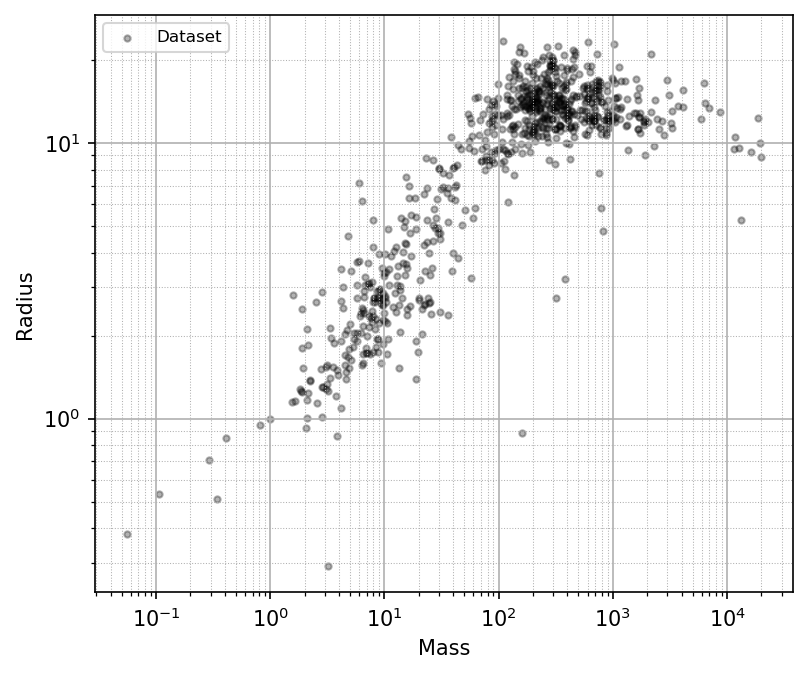

In [5]:
fig, ax = plt.subplots(figsize=(6,5),dpi=150)
ax.scatter(dataset.mass, dataset.radius, c='k', marker='.', alpha=.3, label='Dataset')
ax.legend(fontsize=8, loc="upper left")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass')
ax.set_ylabel('Radius')
ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)
ax.minorticks_on()
# plt.savefig('published_output/ParametersSet5/dataset.png')

## Find the outliers

I look at the planets with a radius $R < 6 R_{\oplus}$ and mass $M > 100 M_{\oplus}$ (area under main curve on middle right of plot)

I also look at the planets with a radius $R < 0.6 R_{\oplus}$ because they seem to be a bit off (bottom left corner)

In [6]:
outliers = []
for i in range(len(dataset)):
    
    if ( (dataset.radius.loc[dataset.index[i]] <= 6e0
          and dataset.mass.loc[dataset.index[i]] >= 1e2)
    or (dataset.radius.loc[dataset.index[i]] <= 5e-1
        and dataset.mass.loc[dataset.index[i]] >= 1e0) 
    or (dataset.radius.loc[dataset.index[i]] <= 7e-1
        and dataset.mass.loc[dataset.index[i]] >= 2e-1)
    or (dataset.radius.loc[dataset.index[i]] <= 1.5e0 
        and dataset.mass.loc[dataset.index[i]] <= 4e1 and dataset.mass.loc[dataset.index[i]] >= 6e0)
    or (dataset.radius.loc[dataset.index[i]] <= 9e-1 
        and dataset.mass.loc[dataset.index[i]] <= 1e1 and dataset.mass.loc[dataset.index[i]] >= 1e0)
    or (dataset.radius.loc[dataset.index[i]] <= 1e1 and dataset.radius.loc[dataset.index[i]] >= 4e0 
        and dataset.mass.loc[dataset.index[i]] <= 7e0 and dataset.mass.loc[dataset.index[i]] >= 4e0)
    or (dataset.radius.loc[dataset.index[i]] <= 3e0 and dataset.radius.loc[dataset.index[i]] >= 2e0 
        and dataset.mass.loc[dataset.index[i]] <= 3e0 and dataset.mass.loc[dataset.index[i]] >= 1e0)):

    
        outliers.append(dataset.loc[dataset.index[i]])
        
outliers_df = pd.DataFrame(outliers)
outliers_df

,mass,orbital_period,eccentricity,temp_eq,star_mass,star_radius,star_teff,star_metallicity,radius
HIP 94235 b,378.851461,7.712121,0.320,1084.730305,1.094,1.080,5991.0,0.000,3.208010
K2-137 b,158.914203,0.179715,0.000,1466.627670,0.460,0.440,3492.0,0.080,0.885509
K2-138 f,1.589142,12.757590,0.364,758.014008,0.930,0.860,5378.0,0.160,2.813454
KOI-4777,0.340076,0.412000,0.000,1198.515429,0.410,0.400,3515.0,0.100,0.510009
Kepler-107 d,3.801228,7.958390,0.000,1174.426276,1.240,1.450,5854.0,0.321,0.863092
Kepler-11 c,2.860456,13.024100,0.026,859.562803,0.960,1.060,5663.0,0.000,2.869499
Kepler-11 f,1.906970,46.688800,0.013,562.305023,0.960,1.060,5663.0,0.000,2.488394
Kepler-223 e,4.799209,19.725670,0.051,985.527943,1.120,1.720,5829.0,-0.211,4.595682
Kepler-37 b,3.178284,13.367310,0.000,733.086484,0.870,0.790,5417.0,-0.320,0.291433
Kepler-79 d,6.038740,52.090200,0.025,633.672107,1.170,1.300,6174.0,-0.073,7.162539


In [7]:
# Save outliers to pickle file
# print_list(outliers_df, 'published_output/ParametersSet5/', 'outliersSet5.pkl')

In [8]:
no_of_colors=len(outliers)
color_list=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]

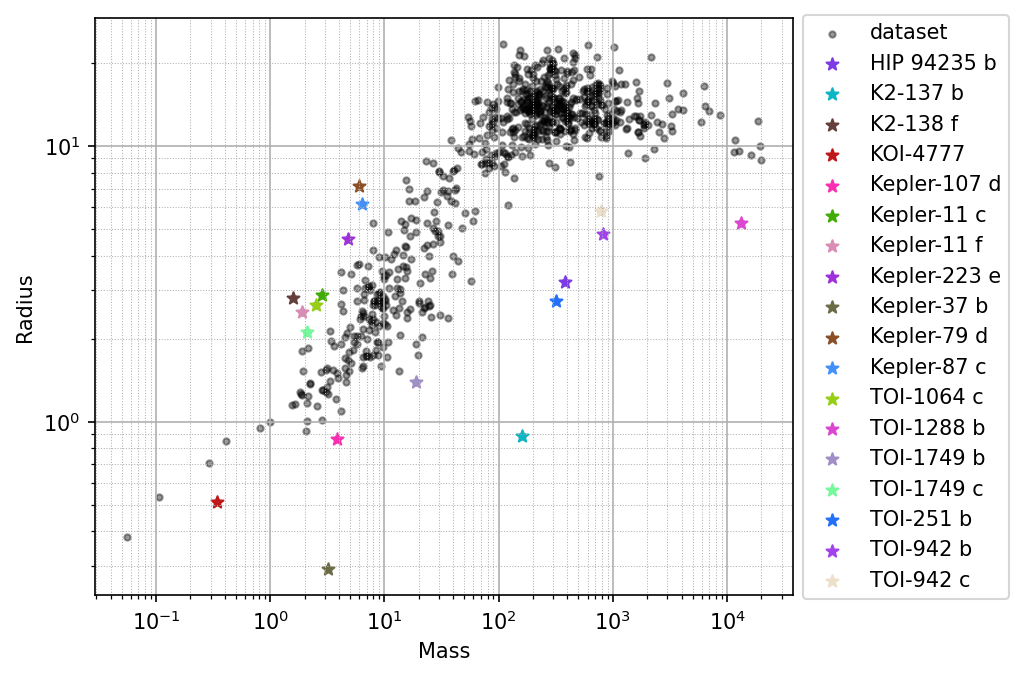

In [10]:
fig, ax = plt.subplots(figsize=(6,5),dpi=150)

ax.scatter(dataset.mass, dataset.radius, c='k', marker='.', alpha=0.4, label='dataset')

for i in range (len(outliers)):
    ax.scatter(outliers_df.mass.loc[outliers_df.index[i]], outliers_df.radius.loc[outliers_df.index[i]],
               marker='*', c=color_list[i], label=outliers_df.index[i])
    
# for i in range (len(outliers)):
#     ax.scatter(outliers_df.mass.loc[outliers_df.index[i]], outliers_df.radius.loc[outliers_df.index[i]],
#                marker='*', label=outliers_df['# name'].loc[outliers_df.index[i]])

ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Mass')
ax.set_ylabel('Radius')

ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)
ax.minorticks_on()
plt.savefig('published_output/ParametersSet5/test.png', bbox_inches='tight')

## Articles For Each Planet

Find if someone found a better mass definition or if they are really outliers

- HIP 94235b:
    - http://exoplanet.eu/catalog/hip_94235_b/
    - A mini-Neptune transiting a bright star in the AB Doradus moving group. 
    - HIP 94235 is a G-dwarf part of a 50 au G-M binary system.
    - Discovered by Transit
    - Adopting the mass-radius relationship from Wolfgang et al. (2016), HIP 94235 b has a predicted mass of 11.2 ± 1.4 M⊕
    - Keep it on side to get its radius with our method
    
    
- K2-33 b:
    - http://exoplanet.eu/catalog/k2-33_b/
    - ~ 10 Myr, super-Neptune-sized exoplanet orbits a late-type pre-main-sequence M3.5 dwarf in the Upper Scorpius OB Association every 5.42 days.
    - The planet is 50 per cent larger than Neptune, and its mass is less than 3.6 times that of Jupiter (at 99.7 per cent confidence), with a true mass likely to be similar to that of Neptune.
    - Seems like a very specific planet 
    
    
- KOI-4777:
    - http://exoplanet.eu/catalog/koi-4777/
    - ultra-short-period planet orbiting the M dwarf KOI-4777
    - Mars sized exoplanet (Rp = 0.51 ± 0.03R⊕) orbiting the host star every 0.412 days (∼9.9 hr)
    - We see no evidence for additional massive companions using our HPF RVs.
    - We constrain the upper 3σ mass to Mp < 0.34 M⊕ by assuming the planet is less dense than iron.
    - Obtaining a mass measurement for KOI-4777.01 is beyond current instrumental capabilities.
    - Keep it on side to get its radius with our method
    
    
- Kepler-102 c:
    - http://exoplanet.eu/catalog/kepler-102_c/
    - five-planet Kepler-102 system.
    - Despite having several near resonant period ratios, we find that mean-motion resonances are unlikely to directly cause instability for plausible planet masses in this system.
    - Kepler-102 b period: 5.287  radius: 0.05 +0.10 -0.50 R⊕, Mass: 0.41 +- 1.6
    

- TOI-251 b:
    - http://exoplanet.eu/catalog/toi-251_b/
    - We report the discovery and validation of two planetary systems with ages ~300 Myr from observations by the Transiting Exoplanet Survey Satellite (TESS)
    - 2.74 R⊕ +-0.18 mini-Neptune with a 4.94 day period.


- TOI-942:
    - The 20-160 Myr old K star TOI-942 hosts a system of inflated Neptune-sized planets
    - TOI-942 b:
        - http://exoplanet.eu/catalog/toi-942_b/
        - TOI-942b orbiting in a period of 4.32 days with a radius of 4.81 -+ 0.20
    - TOI-942 c:
        - http://exoplanet.eu/catalog/toi-942_c/
        - TOI-942c orbiting in a period of 10.16 days with a radius of 5.79 -+ 0.18 0.19
    - We obtained a series of spectroscopic observations with the CHIRON facility to characterize the host star properties and constrain the masses of the planets in each system. CHIRON is a high-resolution spectrograph on the 1.5 m SMARTS telescope, located at Cerro Tololo Inter-American Observatory (CTIO), Chile.
    - 3σ mass upper limit for the 3 planets
    - The 3 planets look very specific (young hot Neptunes)
    
- LP 890-9 b & c :
    - http://exoplanet.eu/catalog/lp_890-9_b/ 
    - the masses (and thus bulk densities) of the LP 890-9 planets are currently poorly constrained
    - The derived upper limits on the planetary masses (using the orbital inclinations from our transit analysis, Table 3) are Mp < 13.2 M⊕ for planet b and Mp < 25.3 M⊕ for planet c at 2σ. Both are well within the planetary regime